In [330]:
import utils
import importlib
importlib.reload(utils)
from utils import *

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn import linear_model

In [331]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
path_dataset = 'Bike-Sharing-Dataset/bikes_day.csv'
df = pd.read_csv(path_dataset)

In [332]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344,0.364,0.806,0.160,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363,0.354,0.696,0.249,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196,0.189,0.437,0.248,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200,0.212,0.590,0.160,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.227,0.229,0.437,0.187,82,1518,1600


In [333]:
df.shape

(670, 16)

In [334]:
df.season.unique()

array([1, 2, 3, 4])

In [335]:
df.weathersit.unique()

array([2, 1, 3])

In [336]:
df.weekday.unique()

array([6, 0, 1, 2, 3, 4, 5])

In [337]:
x = df.drop(['instant','dteday','casual','registered','cnt'], axis=1)
#x = df.drop(['dteday','casual','registered','cnt'], axis=1)
y = df['cnt']
stratify = df[['season','weathersit']]

x_train = x[0:400]
x_test = x[401:670]
y_train = y[0:400]
y_test= y[401:670]

x_train
#x_train, x_test, y_train, y_test = train_test_split( x, y, train_size=0.75, stratify=stratify)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,0,1,0,6,0,2,0.344,0.364,0.806,0.160
1,1,0,1,0,0,0,2,0.363,0.354,0.696,0.249
2,1,0,1,0,1,1,1,0.196,0.189,0.437,0.248
3,1,0,1,0,2,1,1,0.200,0.212,0.590,0.160
4,1,0,1,0,3,1,1,0.227,0.229,0.437,0.187
5,1,0,1,0,4,1,1,0.204,0.233,0.518,0.090
6,1,0,1,0,5,1,2,0.197,0.209,0.499,0.169
7,1,0,1,0,6,0,2,0.165,0.162,0.536,0.267
8,1,0,1,0,0,0,1,0.138,0.116,0.434,0.362
9,1,0,1,0,1,1,1,0.151,0.151,0.483,0.223


## KNeighborsRegressor

In [338]:
neigh = KNeighborsRegressor(n_neighbors=15, weights='uniform', algorithm='brute')
neigh.fit(x_train, y_train) 

y_pred = neigh.predict(x_test)
res = np.sqrt(mean_squared_error(y_test, y_pred))

r2_score(y_test, y_pred)

-1.7359682167287396

In [339]:
rmses_train = []
rmses_test = []

for i in range(1,100):
    neigh = KNeighborsRegressor(n_neighbors=i, weights='uniform', algorithm='brute')
    neigh.fit(x_train, y_train) 

    y_pred_train = neigh.predict(x_train)
    rmses_train.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))  

    y_pred = neigh.predict(x_test)
    rmses_test.append(np.sqrt(mean_squared_error(y_test, y_pred)))

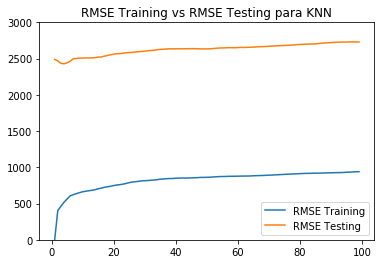

In [340]:
plt.plot(range(1,100, 1), rmses_train, label='RMSE Training')
plt.plot(range(1,100, 1), rmses_test, label='RMSE Testing')
plt.ylim((0, 3000))
plt.legend(loc="best")
plt.title("RMSE Training vs RMSE Testing para KNN")
plt.show()

## DecisionTreeRegressor

In [341]:
rmses_train = []
rmses_test = []

for i in range(1,7):
    regressor = DecisionTreeRegressor(random_state=0, max_depth=i*5)
    regressor.fit(x_train, y_train)
    
    y_pred = regressor.predict(x_train)
    rmses_train.append(np.sqrt(mean_squared_error(y_train, y_pred)))
    
    y_pred_test = regressor.predict(x_test)
    rmses_test.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))

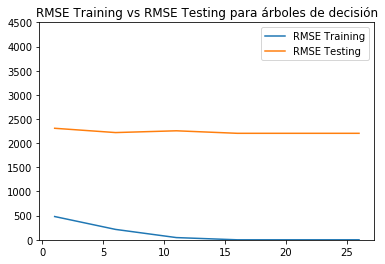

In [342]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(range(1,30, 5), rmses_train, label='RMSE Training')
plt.plot(range(1,30, 5), rmses_test, label='RMSE Testing')
plt.ylim((0, 4500))
plt.legend(loc="best")
plt.title("RMSE Training vs RMSE Testing para árboles de decisión")
plt.show()

In [343]:
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [344]:
y_pred = regr.predict(x_test)
res = mean_squared_error(x_test, y_pred)
np.sqrt(res)

ValueError: y_true and y_pred have different number of output (11!=1)

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(x_train, y_train, cv=3)